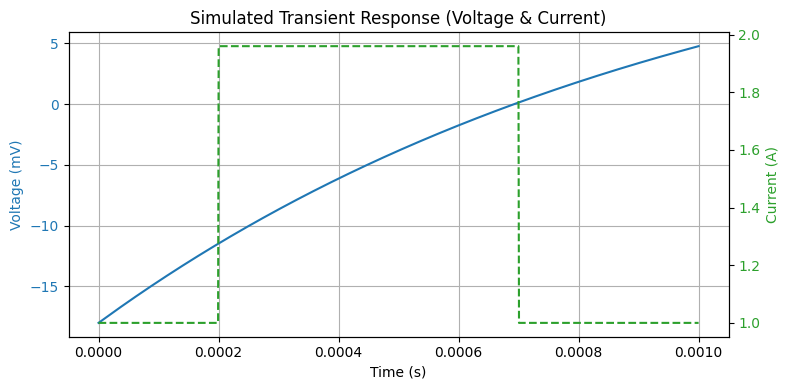

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step
[proc] Executing command: /usr/bin/cmake --version
[proc] Executing command: /usr/bin/cmake -E capabilities
[kit] Successfully loaded 4 kits from /home/lxl/.local/share/CMakeTools/cmake-tools-kits.json
[variant] Loaded new set of variants
[proc] Executing command: /usr/bin/gcc -v
[cmakefileapi-driver] This version of CMake does not
# 时间轴
t = np.linspace(0, 1e-3, 1000)  # 0到1ms，1000个点

# -------- 模拟电压通道 (Ch1) --------
# 简单的RC电路阶跃响应，带欠阻尼振荡
R = 1e3  # 1k Ohm
C = 1e-6  # 1uF
L = 10e-6  # 10uH (假设有电感，形成二阶系统)

# 二阶系统传递函数：1 / (L*C*s^2 + R*C*s + 1)
num = [1]
den = [L*C, R*C, 1]
system = lti(num, den)
t_out, v_out = step(system, T=t)

# 调整幅度到 -38mV 到 +34mV
v_out = (v_out - 0.5) * (34 + 38) / 2e3  # 放缩
v_out = v_out * 1e3  # 转为mV

# -------- 模拟电流通道 (Ch4) --------
# 电流阶跃响应
i_low = 1.00  # A
i_high = 1.96  # A

i_out = np.ones_like(t) * i_low
i_out[t > 0.2e-3] = i_high  # 在0.2ms时电流阶跃
i_out[t > 0.7e-3] = i_low   # 在0.7ms时电流回落

# -------- 绘图 --------
fig, ax1 = plt.subplots(figsize=(8, 4))

# 绘制电压（Ch1）
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (mV)', color=color)
ax1.plot(t, v_out, color=color, label='Ch1 Voltage')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# 创建第二y轴用于电流（Ch4）
ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Current (A)', color=color)  
ax2.plot(t, i_out, color=color, label='Ch4 Current', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Simulated Transient Response (Voltage & Current)')
fig.tight_layout()
plt.show()


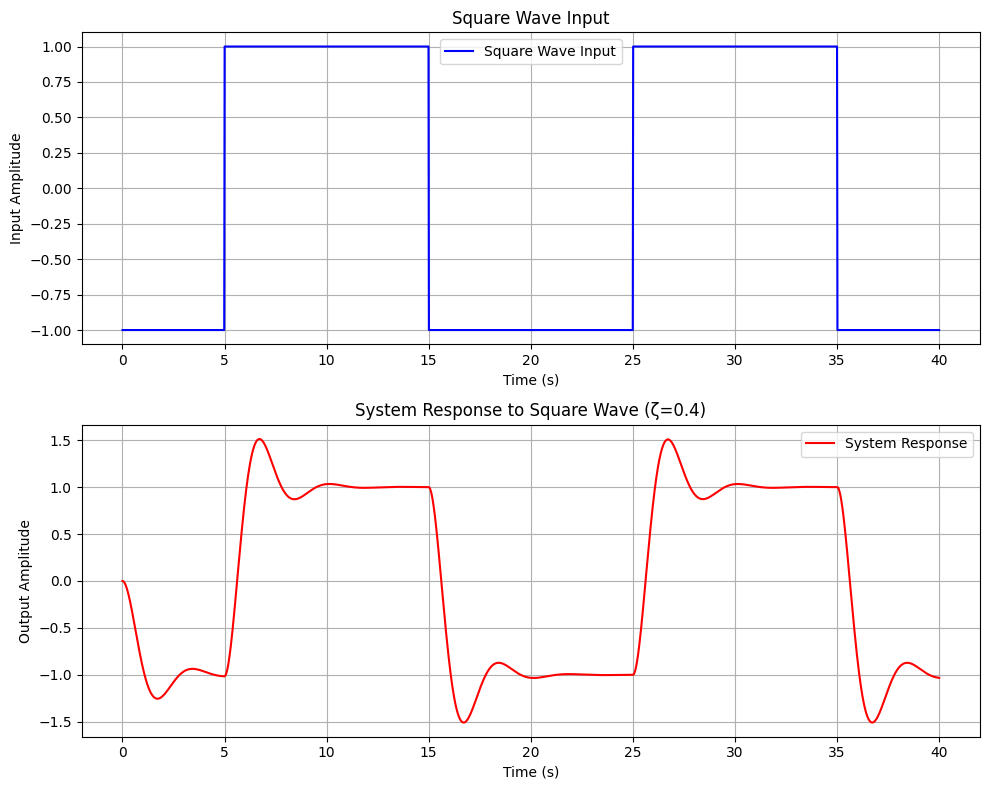

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 定义二阶系统参数
zeta = 0.4  # 阻尼比
omega_n = 2  # 自然频率

# 创建时间数组
t = np.linspace(0, 40, 2000)  # 0到20秒，2000点

# 生成方波输入
period = 20  # 方波周期（秒）
square_wave = signal.square(2 * np.pi * (1/period) * (t-5))  # 幅度为±1的方波

# 定义二阶系统传递函数
# 传递函数：G(s) = ω_n^2 / (s^2 + 2ζω_n s + ω_n^2)
num = [omega_n**2]  # 分子
den = [1, 2 * zeta * omega_n, omega_n**2]  # 分母
system = signal.TransferFunction(num, den)

# 模拟系统对方波的响应
t_out, y_out, _ = signal.lsim(system, U=square_wave, T=t)

# 绘制图形
plt.figure(figsize=(10, 8))

# 绘制输入方波
plt.subplot(2, 1, 1)
plt.plot(t, square_wave, 'b-', label='Square Wave Input')
plt.title('Square Wave Input')
plt.xlabel('Time (s)')
plt.ylabel('Input Amplitude')
plt.grid(True)
plt.legend()
# plt.xlim(-20, 20)  # 限制x轴范围

# 绘制系统响应
plt.subplot(2, 1, 2)
plt.plot(t_out, y_out, 'r-', label='System Response')
plt.title('System Response to Square Wave (ζ=0.4)')
plt.xlabel('Time (s)')
plt.ylabel('Output Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

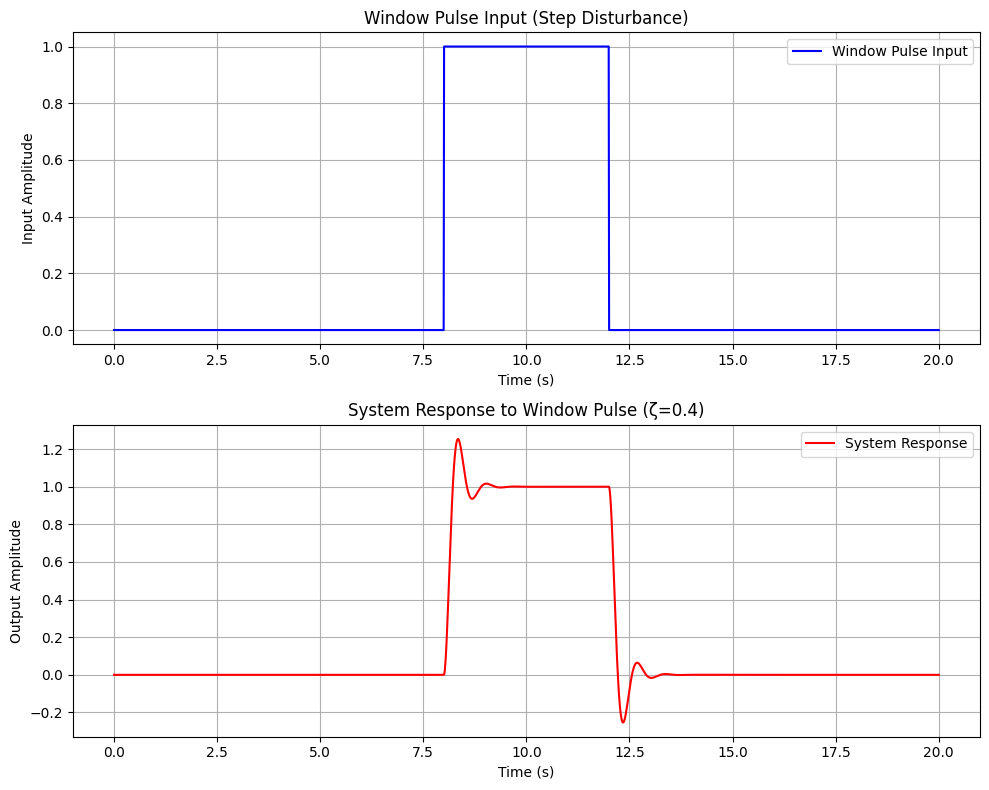

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 定义二阶系统参数
zeta = 0.4  # 阻尼比
omega_n = 10  # 自然频率

# 创建时间数组
t = np.linspace(0, 20, 2000)  # 0到20秒，2000点

# 生成窗口脉冲输入（阶跃扰动）
pulse_start = 8  # 脉冲开始时间（秒）
pulse_end = 12   # 脉冲结束时间（秒）
pulse_wave = np.where((t >= pulse_start) & (t < pulse_end), 1, 0)  # 幅度为1的脉冲

# 定义二阶系统传递函数
# 传递函数：G(s) = ω_n^2 / (s^2 + 2ζω_n s + ω_n^2)
num = [omega_n**2]  # 分子
den = [1, 2 * zeta * omega_n, omega_n**2]  # 分母
system = signal.TransferFunction(num, den)

# 模拟系统对窗口脉冲的响应
t_out, y_out, _ = signal.lsim(system, U=pulse_wave, T=t)

# 绘制图形
plt.figure(figsize=(10, 8))

# 绘制输入脉冲
plt.subplot(2, 1, 1)
plt.plot(t, pulse_wave, 'b-', label='Window Pulse Input')
plt.title('Window Pulse Input (Step Disturbance)')
plt.xlabel('Time (s)')
plt.ylabel('Input Amplitude')
plt.grid(True)
plt.legend()

# 绘制系统响应
plt.subplot(2, 1, 2)
plt.plot(t_out, y_out, 'r-', label='System Response')
plt.title('System Response to Window Pulse (ζ=0.4)')
plt.xlabel('Time (s)')
plt.ylabel('Output Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

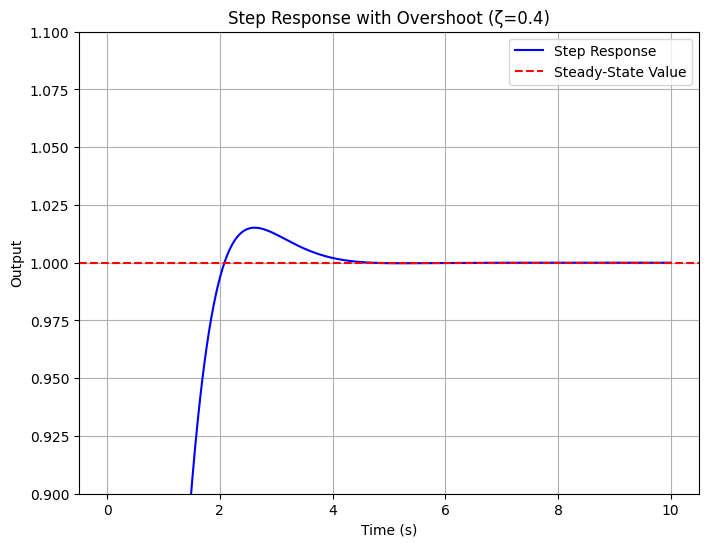

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定义二阶系统参数
zeta = 0.8  # 阻尼比 (<1 时有超调)
omega_n = 2  # 自然频率

# 创建时间数组
t = np.linspace(0, 10, 1000)

# 计算阶跃响应
# 二阶系统阶跃响应公式：y(t) = 1 - e^(-ζω_n t) * (cos(ω_d t) + ζ/√(1-ζ^2) * sin(ω_d t))
# 其中 ω_d = ω_n * √(1-ζ^2)
omega_d = omega_n * np.sqrt(1 - zeta**2)
y = 1 - np.exp(-zeta * omega_n * t) * (np.cos(omega_d * t) + zeta / np.sqrt(1 - zeta**2) * np.sin(omega_d * t))

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(t, y, 'b-', label='Step Response')
plt.axhline(y=1, color='r', linestyle='--', label='Steady-State Value')
plt.title('Step Response with Overshoot (ζ=0.4)')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.ylim(0.9,1.1)
plt.grid(True)
plt.legend()
plt.show()

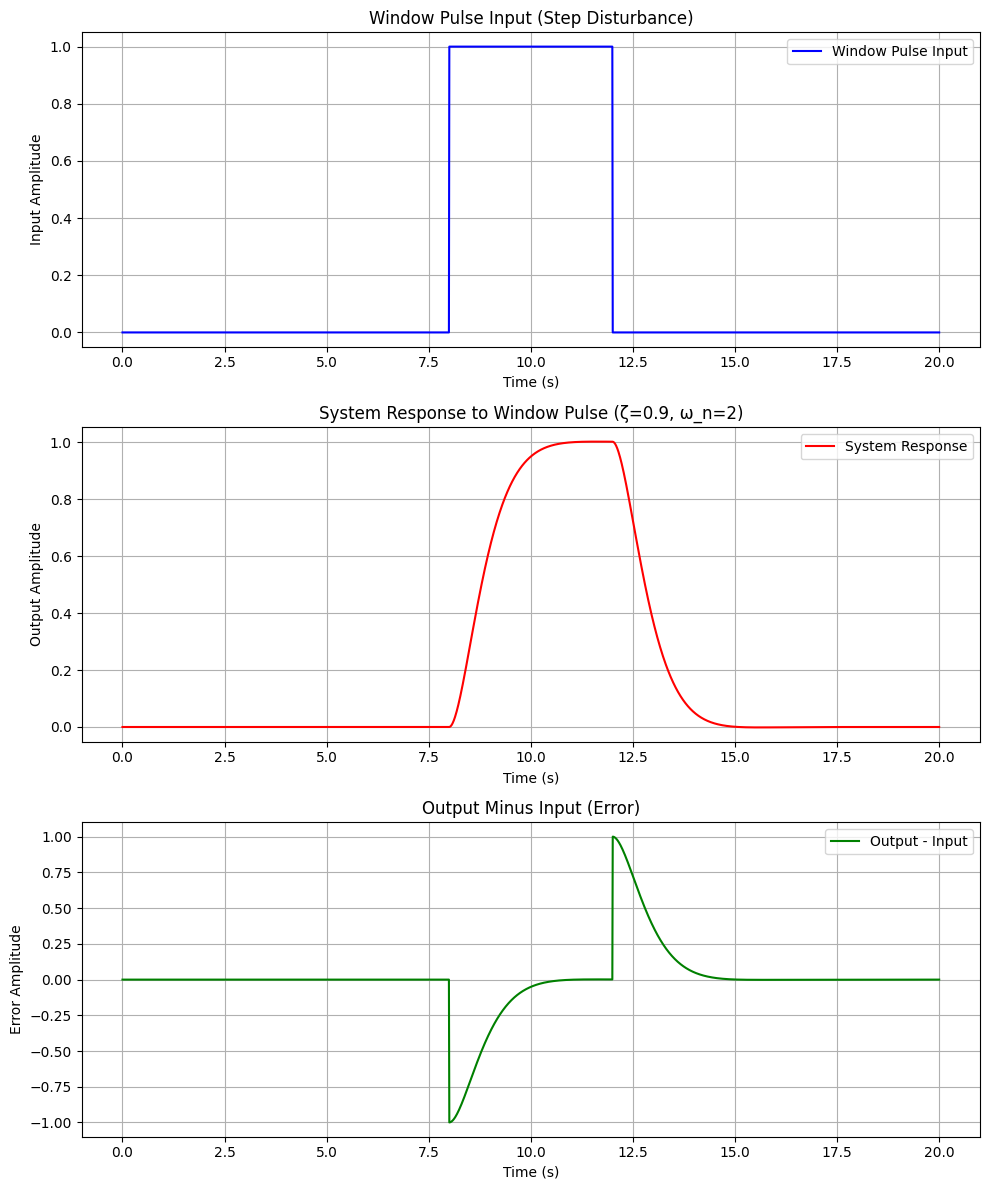

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 定义二阶系统参数
zeta = 0.9  # 阻尼比
omega_n = 2  # 自然频率

# 创建时间数组
t = np.linspace(0, 20, 2000)  # 0到20秒，2000点

# 生成窗口脉冲输入（阶跃扰动）
pulse_start = 8  # 脉冲开始时间（秒）
pulse_end = 12   # 脉冲结束时间（秒）
pulse_wave = np.where((t >= pulse_start) & (t < pulse_end), 1, 0)  # 幅度为1的脉冲

# 定义二阶系统传递函数
# 传递函数：G(s) = ω_n^2 / (s^2 + 2ζω_n s + ω_n^2)
num = [omega_n**2]  # 分子
den = [1, 2 * zeta * omega_n, omega_n**2]  # 分母
system = signal.TransferFunction(num, den)

# 模拟系统对窗口脉冲的响应
t_out, y_out, _ = signal.lsim(system, U=pulse_wave, T=t)

# 计算输出减去输入
error = y_out - pulse_wave

# 绘制图形
plt.figure(figsize=(10, 12))

# 绘制输入脉冲
plt.subplot(3, 1, 1)
plt.plot(t, pulse_wave, 'b-', label='Window Pulse Input')
plt.title('Window Pulse Input (Step Disturbance)')
plt.xlabel('Time (s)')
plt.ylabel('Input Amplitude')
plt.grid(True)
plt.legend()

# 绘制系统响应
plt.subplot(3, 1, 2)
plt.plot(t_out, y_out, 'r-', label='System Response')
plt.title(f'System Response to Window Pulse (ζ={zeta}, ω_n={omega_n})')
plt.xlabel('Time (s)')
plt.ylabel('Output Amplitude')
plt.grid(True)
plt.legend()

# 绘制输出减去输入
plt.subplot(3, 1, 3)
plt.plot(t_out, error, 'g-', label='Output - Input')
plt.title('Output Minus Input (Error)')
plt.xlabel('Time (s)')
plt.ylabel('Error Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

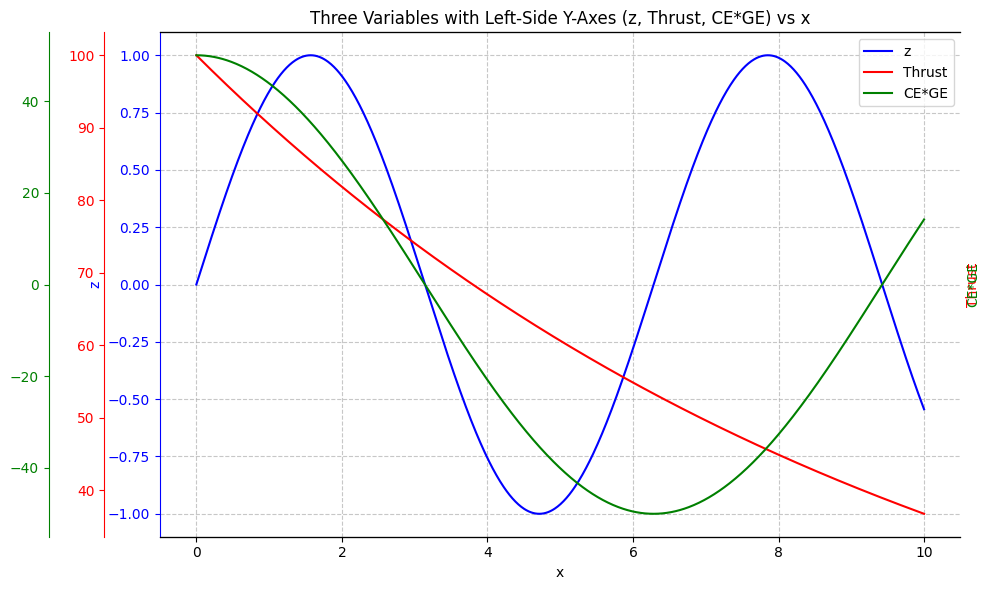

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 生成示例数据
x = np.linspace(0, 10, 1000)  # 横轴 x，从 0 到 10
z = np.sin(x)  # 示例变量 z
thrust = 100 * np.exp(-0.1 * x)  # 示例变量 Thrust
ce_ge = 50 * np.cos(0.5 * x)  # 示例变量 CE*GE

# 创建图形
fig = plt.figure(figsize=(10, 6))

# 创建第一个纵轴（z，蓝色）
ax1 = fig.add_subplot(111)
ax1.plot(x, z, 'b-', label='z')
ax1.set_xlabel('x')
ax1.set_ylabel('z', color='blue')
# 设置刻度和标签显示在左边第一个轴
ax1.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, color='blue', labelcolor='blue')
ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_position(('outward', 0))  # 最内侧轴
ax1.spines['right'].set_visible(False)  # 隐藏右边轴
ax1.grid(True, linestyle='--', alpha=0.7)

# 创建第二个纵轴（Thrust，红色）
ax2 = ax1.twinx()  # 共享 x 轴
ax2.plot(x, thrust, 'r-', label='Thrust')
# 将第二个 y 轴移到左边，并偏移
ax2.spines['left'].set_position(('outward', 40))  # 偏移 40 点
ax2.spines['left'].set_color('red')
ax2.spines['right'].set_visible(False)  # 隐藏右边轴
ax2.set_ylabel('Thrust', color='red')
# 设置刻度和标签显示在左边第二个轴
ax2.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, color='red', labelcolor='red')
# 禁用 ax2 的网格（避免与 ax1 重叠）
ax2.grid(False)

# 创建第三个纵轴（CE*GE，绿色）
ax3 = ax1.twinx()  # 再次共享 x 轴
ax3.plot(x, ce_ge, 'g-', label='CE*GE')
# 将第三个 y 轴移到左边，并进一步偏移
ax3.spines['left'].set_position(('outward', 80))  # 偏移 80 点
ax3.spines['left'].set_color('green')
ax3.spines['right'].set_visible(False)  # 隐藏右边轴
ax3.set_ylabel('CE*GE', color='green')
# 设置刻度和标签显示在左边第三个轴
ax3.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, color='green', labelcolor='green')
# 禁用 ax3 的网格
ax3.grid(False)

# 调整 x 轴刻度只显示一次（由 ax1 控制）
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax3.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

# 设置标题
plt.title('Three Variables with Left-Side Y-Axes (z, Thrust, CE*GE) vs x')

# 调整布局
fig.tight_layout()

# 显示图形
plt.show()

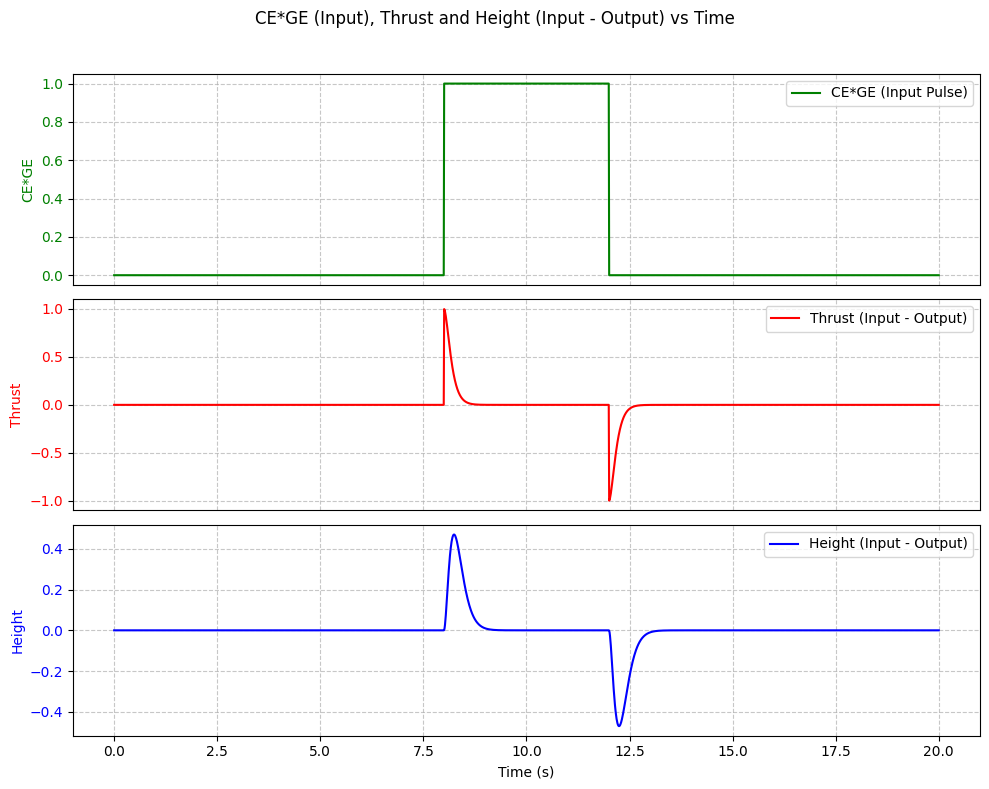

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 定义二阶系统参数
zeta = 1.0  # 阻尼比
omega_n = 10  # 自然频率

# 创建时间数组
t = np.linspace(0, 20, 2000)  # 0到20秒，2000点

# 生成窗口脉冲输入（阶跃扰动）
pulse_start = 8  # 脉冲开始时间（秒）
pulse_end = 12   # 脉冲结束时间（秒）
pulse_wave = np.where((t >= pulse_start) & (t < pulse_end), 1, 0)  # 幅度为1的脉冲

# 定义二阶系统传递函数
# 传递函数：G(s) = ω_n^2 / (s^2 + 2ζω_n s + ω_n^2)
num = [omega_n**2]  # 分子
den = [1, 2 * zeta * omega_n, omega_n**2]  # 分母
system = signal.TransferFunction(num, den)

# 模拟系统对窗口脉冲的响应
t_out, y_out, _ = signal.lsim(system, U=pulse_wave, T=t)

t_out2, y_out2, _ = signal.lsim(system, U = y_out, T=t)

# 计算输入减输出（误差）
error = pulse_wave - y_out
error2 =y_out - y_out2

# 创建图形，包含三个子图，共享 x 轴
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# 第一个子图：CE*GE（脉冲输入，绿色）
ax1.plot(t, pulse_wave, 'g-', label='CE*GE (Input Pulse)')
ax1.set_ylabel('CE*GE', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper right')

# 第二个子图：Thrust（输入减输出，红色）
ax2.plot(t_out, error, 'r-', label='Thrust (Input - Output)')
ax2.set_ylabel('Thrust', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')

# 第三个子图：Height（输入减输出，蓝色）
ax3.plot(t_out2, error2, 'b-', label='Height (Input - Output)')
ax3.set_ylabel('Height', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.legend(loc='upper right')

# 设置共享的 x 轴标签（仅在最下方子图显示）
ax3.set_xlabel('Time (s)')

# 禁用上两个子图的 x 轴刻度和标签
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# 设置标题
fig.suptitle('CE*GE (Input), Thrust and Height (Input - Output) vs Time', fontsize=12)

# 调整布局，避免重叠
fig.tight_layout()
fig.subplots_adjust(top=0.9)  # 为标题留出空间

# 显示图形
plt.show()

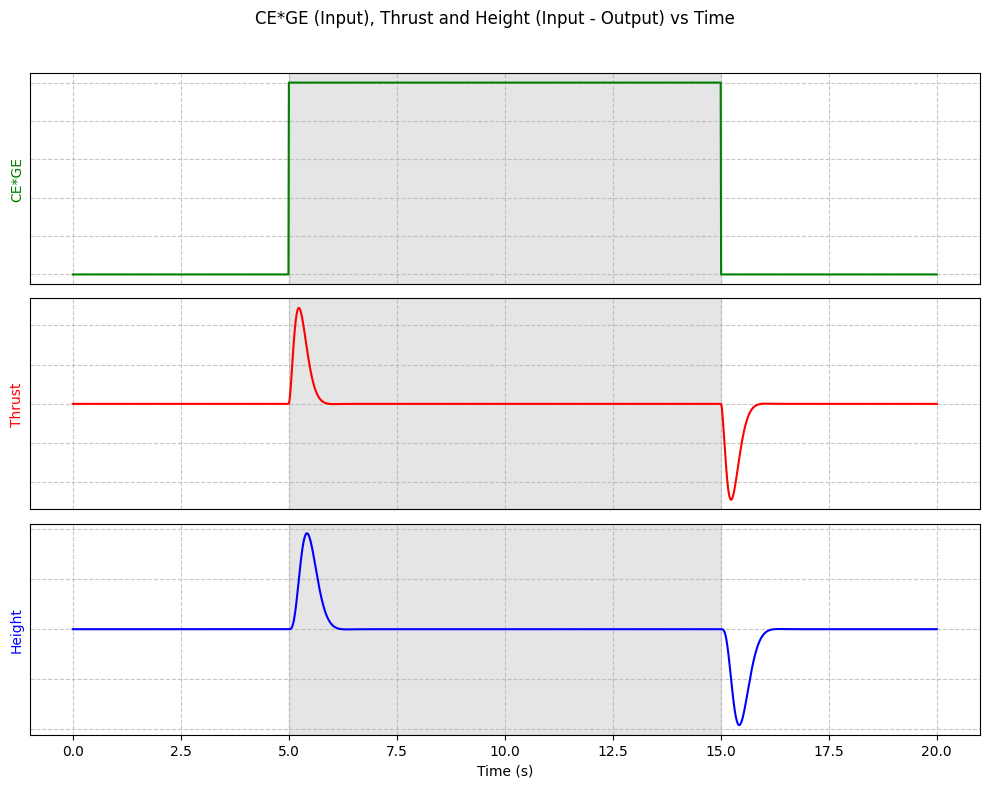

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 定义二阶系统参数
zeta = 0.9  # 阻尼比
omega_n = 10  # 自然频率

# 创建时间数组
t = np.linspace(0, 20, 2000)  # 0到20秒，2000点

# 生成窗口脉冲输入（阶跃扰动）
pulse_start = 5  # 脉冲开始时间（秒）
pulse_end = 15   # 脉冲结束时间（秒）
pulse_wave = np.where((t >= pulse_start) & (t < pulse_end), 1, 0)  # 幅度为1的脉冲

# 定义二阶系统传递函数
# 传递函数：G(s) = ω_n^2 / (s^2 + 2ζω_n s + ω_n^2)
num = [omega_n**2]  # 分子
den = [1, 2 * zeta * omega_n, omega_n**2]  # 分母
system = signal.TransferFunction(num, den)

# 模拟系统对窗口脉冲的响应
t_out, y_out, _ = signal.lsim(system, U=pulse_wave, T=t)

t_out2, y_out2, _ = signal.lsim(system, U = y_out, T=t)

t_out3, y_out3, _ = signal.lsim(system, U = y_out2, T=t)

# 计算输入减输出（误差）
error = pulse_wave - y_out
error2 =y_out - y_out2
error3 = y_out2 - y_out3

# 创建图形，包含三个子图，共享 x 轴
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# 第一个子图：CE*GE（脉冲输入，绿色）
ax1.plot(t, pulse_wave, 'g-', label='Step Disturbance')
ax1.set_ylabel('CE*GE', color='green')
ax1.tick_params(axis='y', left=False, labelleft=False, labelcolor='green')
ax1.grid(True, linestyle='--', alpha=0.7)
# ax1.legend(loc='upper right')
# 添加阴影区域
ax1.axvspan(pulse_start, pulse_end, color='gray', alpha=0.2, label='Pulse Region')

# 第二个子图：Thrust（输入减输出，红色）
ax2.plot(t_out, error2, 'r-', label='Thrust (Input - Output)')
ax2.set_ylabel('Thrust', color='red')
ax2.tick_params(axis='y', left=False, labelleft=False, labelcolor='red')
ax2.grid(True, linestyle='--', alpha=0.7)
# ax2.legend(loc='upper right')
# 添加阴影区域
ax2.axvspan(pulse_start, pulse_end, color='gray', alpha=0.2, label='Pulse Region')

# 第三个子图：Height（输入减输出，蓝色）
ax3.plot(t_out, error3, 'b-', label='Height (Input - Output)')
ax3.set_ylabel('Height', color='blue')
ax3.tick_params(axis='y', left=False, labelleft=False, labelcolor='blue')  # 禁用 y 轴刻度
ax3.grid(True, linestyle='--', alpha=0.7)
# ax3.legend(loc='upper right')
# 添加阴影区域
ax3.axvspan(pulse_start, pulse_end, color='gray', alpha=0.2, label='Pulse Region')

# 设置共享的 x 轴标签（仅在最下方子图显示）
ax3.set_xlabel('Time (s)')

# 禁用上两个子图的 x 轴刻度和标签
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# 设置标题
fig.suptitle('CE*GE (Input), Thrust and Height (Input - Output) vs Time', fontsize=12)

# 调整布局，避免重叠
fig.tight_layout()
fig.subplots_adjust(top=0.9)  # 为标题留出空间

# 显示图形
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar

# 参数
H = 9.2  # 总高度
R = 2.3  # 螺旋桨半径

# delta_ce 计算
def delta_ce(h_ce):
    return 0.5 + 0.5 * np.sqrt(1 + (R**2) / (8 * h_ce**2))

# delta_ge 计算
def delta_ge(h_ge):
    return 1 / (1 - (R / (4 * h_ge))**2)

# 目标函数 F_d
def F_d(h_ce):
    # 防止除0或者虚数
    epsilon = 1e-6
    h_ce = max(h_ce, epsilon)
    h_ge = max(H - h_ce, epsilon)
    
    # 计算delta
    d_ce = delta_ce(h_ce)
    d_ge = delta_ge(h_ge)
    
    # 防止delta_ge无穷大（分母接近0）
    if np.isinf(d_ge) or np.isnan(d_ge):
        return 1e6  # 返回一个很大的数避免这个解

    return abs(d_ce * d_ge - 1)  # 绝对值形式

# 新的无物理约束范围（仅防止除零）
h_ce_min = 1e-6
h_ce_max = H - 1e-6  # 避免h_ge为0

# 最优化
result = minimize_scalar(F_d, bounds=(h_ce_min, h_ce_max), method='bounded')

# 输出
print(f"Optimal h_ce: {result.x:.6f}")
print(f"Corresponding h_ge: {H - result.x:.6f}")
print(f"Minimum F_d: {F_d(result.x):.6f}")


Optimal h_ce: 4.038934
Corresponding h_ge: 5.161066
Minimum F_d: 0.022728


In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar

# 参数
H = 9.2  # 总高度
R = 2.3  # 螺旋桨半径

# delta_ce 计算
def delta_ce(h_ce):
    return 0.5 + 0.5 * np.sqrt(1 + (R**2) / (8 * h_ce**2))

# delta_ge 计算
def delta_ge(h_ge):
    return 1 / (1 - (R / (4 * h_ge))**2)

# 目标函数 F_d
def F_d(h_ce):
    # 防止除0或者虚数
    epsilon = 1e-6
    h_ce = max(h_ce, epsilon)
    h_ge = max(H - h_ce, epsilon)
    
    # 计算delta
    d_ce = delta_ce(h_ce)
    d_ge = delta_ge(h_ge)
    
    # 防止delta_ge无穷大（分母接近0）
    if np.isinf(d_ge) or np.isnan(d_ge):
        return 1e6  # 返回一个很大的数避免这个解

    return abs(d_ce * d_ge - 1)  # 绝对值形式

# 新的无物理约束范围（仅防止除零）
h_ce_min = 1e-6
h_ce_max = H - 1e-6  # 避免h_ge为0

# 最优化
result = minimize_scalar(F_d, bounds=(h_ce_min, h_ce_max), method='bounded')

# 输出
print(f"Optimal h_ce: {result.x:.6f}")
print(f"Corresponding h_ge: {H - result.x:.6f}")
print(f"Minimum F_d: {F_d(result.x):.6f}")


Optimal h_ce: 4.038934
Corresponding h_ge: 5.161066
Minimum F_d: 0.022728


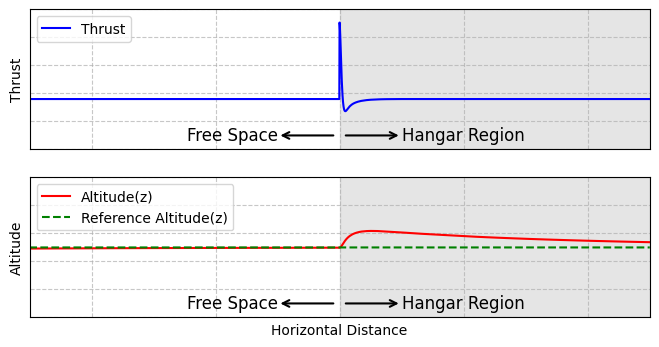

Plot saved to pdf_disturbance.pdf


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Load the data from the CSV file ---
# Replace 'z_pos.csv' with the actual path to your CSV file
try:
    df = pd.read_csv('z_pos.csv')
except FileNotFoundError:
    print("Error: 'z_pos.csv' not found. Please make sure the CSV file is in the same directory as the script or provide the full path.")
    exit()

# --- 2. Create the plot ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), sharex=True)

# Define common properties for text (excluding ha and va)
# ha and va will be set explicitly in each annotate call
text_common_props = dict(fontsize=12, color='k')

# Define the x-axis limits and regions
plot_x_min, plot_x_max = 15, 25
hangar_start = 20
hangar_end = 25

# --- Subplot 1: Thrust ---
ax1.plot(df['t'], df['thrust'], label='Thrust', color='blue')
ax1.axvspan(hangar_start, hangar_end, color='gray', alpha=0.2, )
ax1.set_ylabel('Thrust')
ax1.set_ylim(16, 26)
ax1.set_xlim(plot_x_min, plot_x_max)
# ax1.set_title('Thrust over Time')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper left')

# Calculate y position for the annotations relative to ax1's y-limits
annotation_y_ax1 = ax1.get_ylim()[0] + 0.1 * (ax1.get_ylim()[1] - ax1.get_ylim()[0])

# Add annotations for ax1
# Free Space (Left Arrow pointing from the right)
ax1.annotate('Free Space',
             xy=(hangar_start - 0.1, annotation_y_ax1), # Arrow points to the boundary of hangar_start
             xytext=(hangar_start - 1, annotation_y_ax1), # Text position, slightly to the left of hangar_start
             arrowprops=dict(arrowstyle='<-', color='k', shrinkA=0, shrinkB=0, linewidth=1.5), # Arrow points left
             **text_common_props, # Apply common text properties
             ha='right', # Horizontal alignment for this specific text
             va='center' # Vertical alignment for this specific text
             )

# Hangar Region (Right Arrow pointing from the left)
ax1.annotate('Hangar Region',
             xy=(hangar_start + 0.1, annotation_y_ax1), # Arrow points to the boundary of hangar_end
             xytext=(hangar_start + 1, annotation_y_ax1), # Text position, slightly to the right of hangar_end
             arrowprops=dict(arrowstyle='<-', color='k', shrinkA=0, shrinkB=0, linewidth=1.5), # Arrow points right
             **text_common_props, # Apply common text properties
             ha='left', # Horizontal alignment for this specific text
             va='center' # Vertical alignment for this specific text
             )

# --- Subplot 2: Z and Z_ref ---
ax2.plot(df['t'], df['z'], label='Altitude(z)', color='red')
ax2.axvspan(hangar_start, hangar_end, color='gray', alpha=0.2)
ax2.plot(df['t'], df['z_ref'], label='Reference Altitude(z)', color='green', linestyle='--')
ax2.set_xlabel('Horizontal Distance')
ax2.set_ylabel('Altitude')
ax2.set_ylim(0.5, 0.6)
ax2.set_xlim(plot_x_min, plot_x_max)
# ax2.set_title('Altitude (z) over Time')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper left')

# Calculate y position for the annotations relative to ax2's y-limits
annotation_y_ax2 = ax2.get_ylim()[0] + 0.1 * (ax2.get_ylim()[1] - ax2.get_ylim()[0])

# Add annotations for ax2
# Free Space (Left Arrow)
ax2.annotate('Free Space',
             xy=(hangar_start - 0.1, annotation_y_ax2),
             xytext=(hangar_start - 1, annotation_y_ax2),
             arrowprops=dict(arrowstyle='<-', color='k', shrinkA=0, shrinkB=0, linewidth=1.5),
             **text_common_props,
             ha='right',
             va='center'
             )

# Hangar Region (Right Arrow)
ax2.annotate('Hangar Region',
             xy=(hangar_start + 0.1, annotation_y_ax2),
             xytext=(hangar_start + 1, annotation_y_ax2),
             arrowprops=dict(arrowstyle='<-', color='k', shrinkA=0, shrinkB=0, linewidth=1.5),
             **text_common_props,
             ha='left',
             va='center'
             )

# --- Tick parameter adjustments ---
# Hide X-axis tick marks and labels
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Hide Y-axis tick marks and labels
ax1.tick_params(axis='y', which='both', left=False, labelleft=False) # Changed labelbottom to labelleft
ax2.tick_params(axis='y', which='both', left=False, labelleft=False) # Changed labelbottom to labelleft

# --- Adjust layout and display ---
output_file = 'pdf_disturbance.pdf'
dpi = 300
plt.savefig(output_file, format='pdf', dpi=dpi, bbox_inches='tight')
plt.show()
plt.close()
print(f"Plot saved to {output_file}")

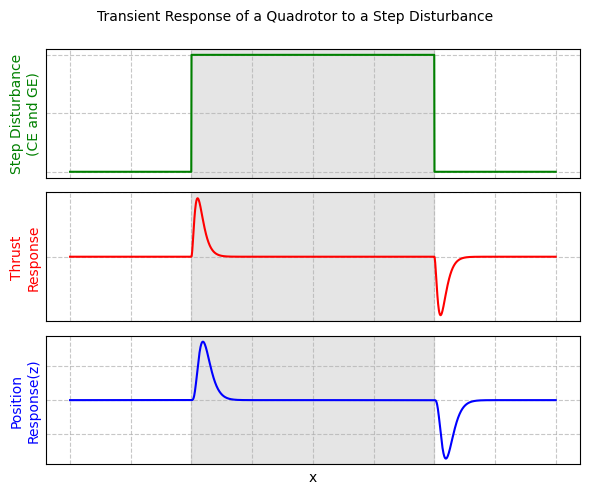

Plot saved to pdf_disturbance.pdf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 定义二阶系统参数
zeta = 1.1  # 阻尼比
omega_n = 10  # 自然频率

# 创建时间数组
t = np.linspace(0, 20, 2000)  # 0到20秒，2000点

# 生成窗口脉冲输入（阶跃扰动）
pulse_start = 5  # 脉冲开始时间（秒）
pulse_end = 15   # 脉冲结束时间（秒）
pulse_wave = np.where((t >= pulse_start) & (t < pulse_end), 1, 0)  # 幅度为1的脉冲

# 定义二阶系统传递函数
# 传递函数：G(s) = ω_n^2 / (s^2 + 2ζω_n s + ω_n^2)
num = [omega_n**2]  # 分子
den = [1, 2 * zeta * omega_n, omega_n**2]  # 分母
system = signal.TransferFunction(num, den)

# 模拟系统对窗口脉冲的响应
t_out, y_out, _ = signal.lsim(system, U=pulse_wave, T=t)

t_out2, y_out2, _ = signal.lsim(system, U = y_out, T=t)

t_out3, y_out3, _ = signal.lsim(system, U = y_out2, T=t)

# 计算输入减输出（误差）
error = pulse_wave - y_out
error2 =y_out - y_out2
error3 = y_out2 - y_out3

# 创建图形，包含三个子图，共享 x 轴
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 5), sharex=True)

# 第一个子图：CE*GE（脉冲输入，绿色）
ax1.plot(t, pulse_wave, 'g-', label='Step Disturbance')
ax1.set_ylabel('Step Disturbance\n(CE and GE)', color='green', fontsize=10)
ax1.tick_params(axis='y', left=False, labelleft=False, labelcolor='green')
ax1.grid(True, linestyle='--', alpha=0.7)
# ax1.legend(loc='upper right')
# 添加阴影区域
ax1.axvspan(pulse_start, pulse_end, color='gray', alpha=0.2, label='Pulse Region')

# 第二个子图：Thrust（输入减输出，红色）
ax2.plot(t_out, error2, 'r-', label='Thrust (Input - Output)')
ax2.set_ylabel('Thrust\nResponse', color='red', fontsize=10)
ax2.tick_params(axis='y', left=False, labelleft=False, labelcolor='red')
ax2.grid(True, linestyle='--', alpha=0.7)
# ax2.legend(loc='upper right')
# 添加阴影区域
ax2.axvspan(pulse_start, pulse_end, color='gray', alpha=0.2, label='Pulse Region')

# 第三个子图：Height（输入减输出，蓝色）
ax3.plot(t_out, error3, 'b-', label='Height (Input - Output)')
ax3.set_ylabel('Position\nResponse(z)', color='blue', fontsize=10)
ax3.tick_params(axis='y', left=False, labelleft=False, labelcolor='blue')  # 禁用 y 轴刻度
ax3.grid(True, linestyle='--', alpha=0.7)
# ax3.legend(loc='upper right')
# 添加阴影区域
ax3.axvspan(pulse_start, pulse_end, color='gray', alpha=0.2, label='Pulse Region')

# 设置共享的 x 轴标签（仅在最下方子图显示）
ax3.set_xlabel('x')

# 禁用上两个子图的 x 轴刻度和标签
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax3.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# 设置标题
# fig.suptitle('Transient Response of a Quadrotor to a Step Disturbance', fontsize=10)

# 调整布局，避免重叠
fig.tight_layout()
fig.subplots_adjust(top=0.9)  # 为标题留出空间

# 显示图形
output_file = 'pdf_disturbance.pdf'
dpi = 300
plt.savefig(output_file, format='pdf', dpi=dpi, bbox_inches='tight')
plt.show()
plt.close()
print(f"Plot saved to {output_file}")

In [44]:
import numpy as np
from scipy.optimize import minimize_scalar

# 参数
H = 9.2  # 总高度
R = 2.3  # 螺旋桨半径

# 计算delta_ce
def delta_ce(h_ce):
    return 0.5 + 0.5 * np.sqrt(1 + (R**2) / (8 * h_ce**2))

# 计算delta_ge
def delta_ge(h_ge):
    return 1 / (1 - (R / (4 * h_ge))**2)

# 目标函数 F_d = (delta_ce * delta_ge - 1) * F_free
# F_free 可忽略，只看相对变化
def F_d(h_ce):
    h_ge = H - h_ce
    d_ce = delta_ce(h_ce)
    d_ge = delta_ge(h_ge)
    return abs(d_ce * d_ge - 1)  # 取绝对值，以防负数

# 变量 h_ce 的约束
h_ce_min = 0.25 * R
h_ce_max = H - R

# 使用scipy优化
result = minimize_scalar(F_d, bounds=(h_ce_min, h_ce_max), method='bounded')

# 输出结果
print(f"Optimal h_ce: {result.x:.4f}")
print(f"Corresponding h_ge: {H - result.x:.4f}")
print(f"Minimum F_d: {F_d(result.x):.6f}")


Optimal h_ce: 4.0389
Corresponding h_ge: 5.1611
Minimum F_d: 0.022728


In [45]:
import numpy as np
from scipy.optimize import minimize_scalar

# 参数
H = 9.2  # 总高度
R = 2.3  # 螺旋桨半径

# delta_ce 计算
def delta_ce(h_ce):
    return 0.5 + 0.5 * np.sqrt(1 + (R**2) / (8 * h_ce**2))

# delta_ge 计算
def delta_ge(h_ge):
    return 1 / (1 - (R / (4 * h_ge))**2)

# 目标函数 F_d
def F_d(h_ce):
    # 防止除0或者虚数
    epsilon = 1e-6
    h_ce = max(h_ce, epsilon)
    h_ge = max(H - h_ce, epsilon)
    
    # 计算delta
    d_ce = delta_ce(h_ce)
    d_ge = delta_ge(h_ge)
    
    # 防止delta_ge无穷大（分母接近0）
    if np.isinf(d_ge) or np.isnan(d_ge):
        return 1e6  # 返回一个很大的数避免这个解

    return abs(d_ce * d_ge - 1)  # 绝对值形式

# 新的无物理约束范围（仅防止除零）
h_ce_min = 1e-6
h_ce_max = H - 1e-6  # 避免h_ge为0

# 最优化
result = minimize_scalar(F_d, bounds=(h_ce_min, h_ce_max), method='bounded')

# 输出
print(f"Optimal h_ce: {result.x:.6f}")
print(f"Corresponding h_ge: {H - result.x:.6f}")
print(f"Minimum F_d: {F_d(result.x):.6f}")


Optimal h_ce: 4.038934
Corresponding h_ge: 5.161066
Minimum F_d: 0.022728


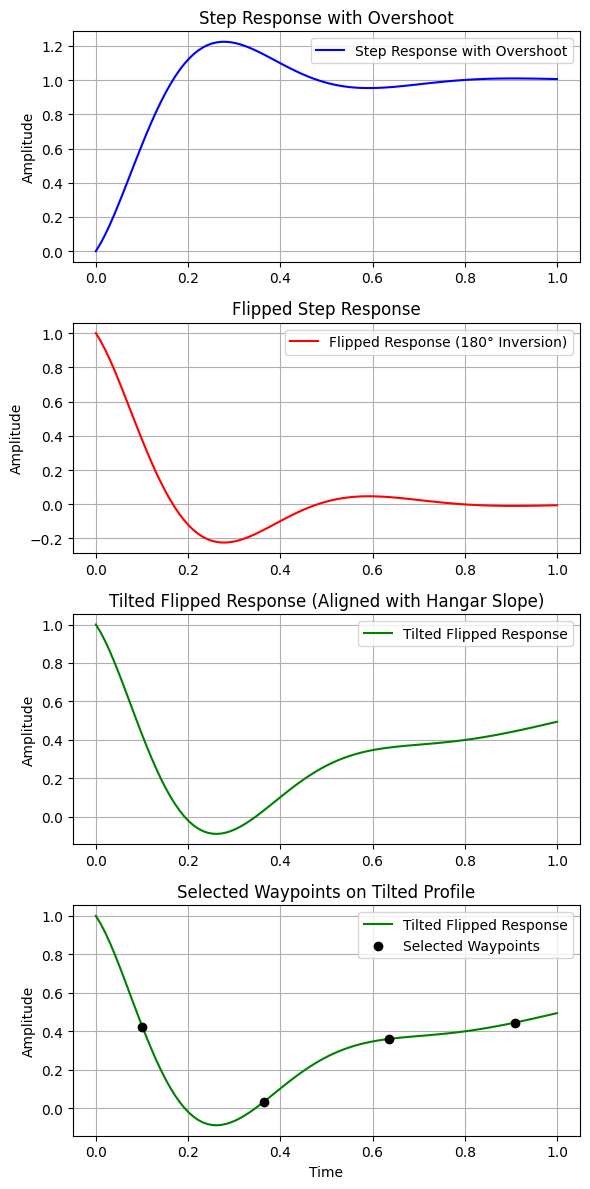

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a classical step response with overshoot
t = np.linspace(0, 1, 100)
step_response = 1 - np.exp(-5*t) * (np.cos(10*t) + 0.1*np.sin(10*t))

# Step 2: Flip the overshoot (180 degree inversion)
flipped_response = -step_response + 1  # flip around the final value (1)

# Step 3: Tilt the flipped response along an inclined line (hangar entry to perch)
incline_slope = 0.5  # example slope
tilted_response = flipped_response + incline_slope * t

# Step 4: Sample 4 waypoints on the tilted profile
sample_indices = np.linspace(10, 90, 4, dtype=int)  # avoid the very start/end points
waypoints_t = t[sample_indices]
waypoints_y = tilted_response[sample_indices]

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(6, 12))

# Plot 1: Original step response
axs[0].plot(t, step_response, 'b', label='Step Response with Overshoot')
axs[0].set_title('Step Response with Overshoot')
axs[0].set_ylabel('Amplitude')
axs[0].legend()
axs[0].grid(True)

# Plot 2: Flipped response
axs[1].plot(t, flipped_response, 'r', label='Flipped Response (180° Inversion)')
axs[1].set_title('Flipped Step Response')
axs[1].set_ylabel('Amplitude')
axs[1].legend()
axs[1].grid(True)

# Plot 3: Tilted flipped response
axs[2].plot(t, tilted_response, 'g', label='Tilted Flipped Response')
axs[2].set_title('Tilted Flipped Response (Aligned with Hangar Slope)')
axs[2].set_ylabel('Amplitude')
axs[2].legend()
axs[2].grid(True)

# Plot 4: Sampled waypoints
axs[3].plot(t, tilted_response, 'g', label='Tilted Flipped Response')
axs[3].scatter(waypoints_t, waypoints_y, c='k', label='Selected Waypoints', zorder=5)
axs[3].set_title('Selected Waypoints on Tilted Profile')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Amplitude')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()


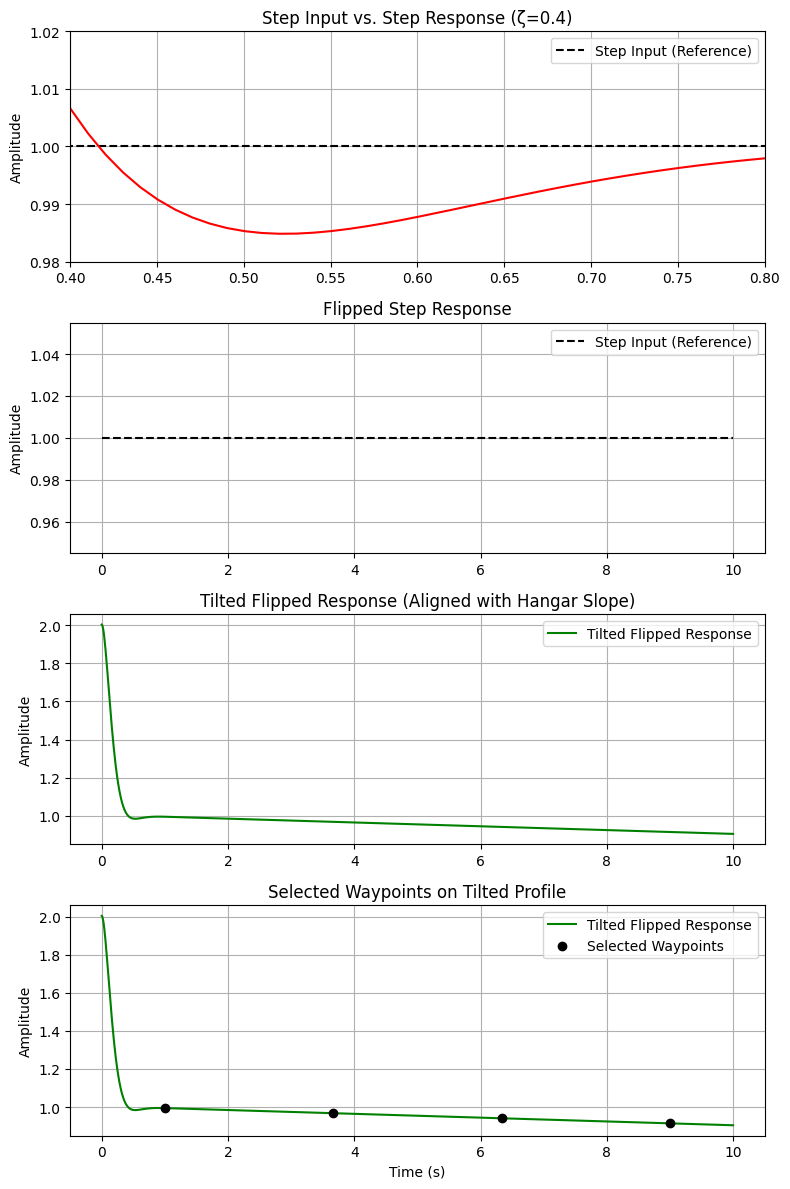

In [3]:
# Re-import necessary libraries after environment reset
import numpy as np
import matplotlib.pyplot as plt

# System parameters
zeta = 0.8  # Damping ratio (lower to produce noticeable overshoot)
omega_n = 10  # Natural frequency

# Time array
t = np.linspace(0, 10, 1000)

# Step response calculation
omega_d = omega_n * np.sqrt(1 - zeta**2)
y = 1 - np.exp(-zeta * omega_n * t) * (
    np.cos(omega_d * t) + zeta / np.sqrt(1 - zeta**2) * np.sin(omega_d * t)
)

# Step signal (input)
u = np.ones_like(t)

# Plot step signal and response
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Plot 1: Step input and step response with overshoot
axs[0].plot(t, u, 'k--', label='Step Input (Reference)')
# axs[0].plot(t, y, 'b', label='System Response with Overshoot')
axs[0].set_title('Step Input vs. Step Response (ζ=0.4)')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0.4,0.8)
axs[0].set_ylim(0.98,1.02)
axs[0].legend()
axs[0].grid(True)

# Plot 2: Flipped response
flipped_y = -y + 2
axs[1].plot(t, u, 'k--', label='Step Input (Reference)')
axs[0].plot(t, flipped_y, 'r', label='Flipped Response (180° Inversion)')
axs[1].set_title('Flipped Step Response')
axs[1].set_ylabel('Amplitude')
# axs[1].set_xlim(0.4,0.8)
# axs[1].set_ylim(0.95,1.05)
axs[1].legend()
axs[1].grid(True)

# Plot 3: Tilted flipped response
incline_slope = -0.01  # small slope to tilt
tilted_response = flipped_y + incline_slope * (t - 0.42)
axs[2].plot(t, tilted_response, 'g', label='Tilted Flipped Response')
axs[2].set_title('Tilted Flipped Response (Aligned with Hangar Slope)')
axs[2].set_ylabel('Amplitude')
# axs[2].set_xlim(0.4,0.8)
# axs[2].set_ylim(0.9,1.1)
axs[2].legend()
axs[2].grid(True)

# Plot 4: Sampled waypoints
sample_indices = np.linspace(100, 900, 4, dtype=int)
waypoints_t = t[sample_indices]
waypoints_y = tilted_response[sample_indices]
axs[3].plot(t, tilted_response, 'g', label='Tilted Flipped Response')
axs[3].scatter(waypoints_t, waypoints_y, c='k', label='Selected Waypoints', zorder=5)
axs[3].set_title('Selected Waypoints on Tilted Profile')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Amplitude')
# axs[3].set_xlim(0.4,0.8)
# axs[3].set_ylim(0.9,1.1)
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()


In [45]:
import numpy as np
from scipy.optimize import fsolve

# 参数
zeta = 0.8
omega_n = 10
omega_d = omega_n * np.sqrt(1 - zeta**2)

# 阶跃响应函数
def step_response(t):
    return 1 - np.exp(-zeta * omega_n * t) * (
        np.cos(omega_d * t) + zeta / np.sqrt(1 - zeta**2) * np.sin(omega_d * t)
    )

# 求解交点的方程 y(t) = flipped_y(t)
def intersection_func(t_val):
    y = step_response(t_val)
    flipped_y = -y + 2
    return y - flipped_y  # 等于0时表示交点

# 初值猜测
initial_guess = 0.6

# 解方程
from scipy.optimize import fsolve
t_intersect = fsolve(intersection_func, initial_guess)
print("交点 t =", t_intersect[0])


交点 t = 0.9399473663977299


In [46]:
import numpy as np

zeta = 0.8  # Damping ratio
omega_n = 10  # Natural frequency

# Calculate damped natural frequency
omega_d = omega_n * np.sqrt(1 - zeta**2)
print(f"omega_d = {omega_d:.4f}")

# Calculate the phase angle phi
phi = np.arctan(zeta / np.sqrt(1 - zeta**2))
print(f"phi (radians) = {phi:.4f}")
print(f"phi (degrees) = {np.degrees(phi):.4f}")

# Calculate the first time t when y = 1
# This corresponds to the first time the oscillatory component becomes zero
# after the response starts.
t_at_y_equals_1 = (phi + np.pi / 2) / omega_d
print(f"The first time y = 1 is approximately t = {t_at_y_equals_1:.4f} seconds")

# Verify by plugging t back into the original equation (optional)
# This verification might show a value very close to 1 due to floating point precision
t_verify = t_at_y_equals_1
y_verify = 1 - np.exp(-zeta * omega_n * t_verify) * (
    np.cos(omega_d * t_verify) + zeta / np.sqrt(1 - zeta**2) * np.sin(omega_d * t_verify)
)
print(f"Verifying y at t = {t_verify:.4f}: y = {y_verify:.4f}")

# To understand the behavior, let's plot a small section around this time
# time_array_for_plot = np.linspace(t_at_y_equals_1 - 0.1, t_at_y_equals_1 + 0.1, 100)
# y_plot = 1 - np.exp(-zeta * omega_n * time_array_for_plot) * (
#     np.cos(omega_d * time_array_for_plot) + zeta / np.sqrt(1 - zeta**2) * np.sin(omega_d * time_array_for_plot)
# )
# import matplotlib.pyplot as plt
# plt.plot(time_array_for_plot, y_plot)
# plt.axhline(y=1, color='r', linestyle='--')
# plt.axvline(x=t_at_y_equals_1, color='g', linestyle='-.')
# plt.xlabel('Time (s)')
# plt.ylabel('Response (y)')
# plt.title('Step Response around y=1 crossing')
# plt.grid(True)
# plt.show()

omega_d = 6.0000
phi (radians) = 0.9273
phi (degrees) = 53.1301
The first time y = 1 is approximately t = 0.4163 seconds
Verifying y at t = 0.4163: y = 1.0000


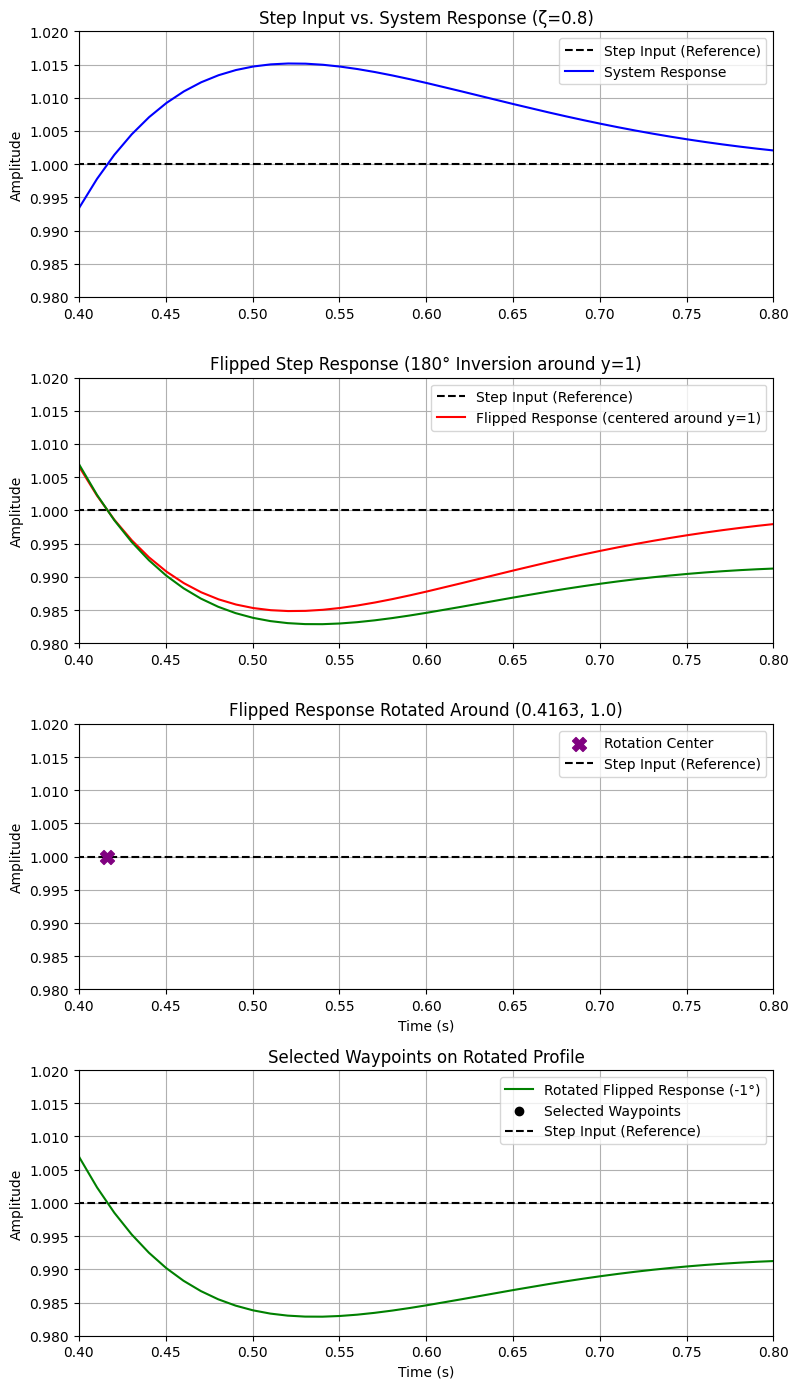

In [67]:
# Re-import necessary libraries after environment reset
import numpy as np
import matplotlib.pyplot as plt

# System parameters
zeta = 0.8  # Damping ratio (lower to produce noticeable overshoot)
omega_n = 10  # Natural frequency

# Time array
t = np.linspace(0, 10, 1000)

# Step response calculation
omega_d = omega_n * np.sqrt(1 - zeta**2)
y = 1 - np.exp(-zeta * omega_n * t) * (
    np.cos(omega_d * t) + zeta / np.sqrt(1 - zeta**2) * np.sin(omega_d * t)
)

# Step signal (input)
u = np.ones_like(t)

# Plot step signal and response
fig, axs = plt.subplots(4, 1, figsize=(8, 14)) # Increased figure height for better spacing

# Plot 1: Step input and step response with overshoot
axs[0].plot(t, u, 'k--', label='Step Input (Reference)')
axs[0].plot(t, y, 'b', label='System Response') # Changed label as overshoot is now visible
axs[0].set_title('Step Input vs. System Response (ζ=0.8)') # Updated zeta in title
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0.4,0.8)
axs[0].set_ylim(0.98,1.02)
axs[0].legend()
axs[0].grid(True)

# Plot 2: Flipped response (y' = -y + 2 -> effectively centered around y=1)
flipped_y = -y + 2
axs[1].plot(t, u, 'k--', label='Step Input (Reference)') # Still useful to see reference
axs[1].plot(t, flipped_y, 'r', label='Flipped Response (centered around y=1)')
axs[1].set_title('Flipped Step Response (180° Inversion around y=1)')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlim(0.4,0.8)
axs[1].set_ylim(0.98,1.02)
axs[1].legend()
axs[1].grid(True)

# --- Third Plot: Rotated Flipped Response ---
# Define the rotation center
t_rotation_center = 0.4163
y_rotation_center = 1.0

# Define the rotation angle (e.g., convert a slope to an angle)
# A positive slope means counter-clockwise rotation, negative for clockwise
# incline_slope = -0.05 # Original slope, convert to angle
# rotation_angle = np.arctan(incline_slope) # For a small slope, angle is approximately slope
# Let's define a specific angle directly for clarity, e.g., -5 degrees
rotation_angle_degrees = -1 # Example: -5 degrees clockwise rotation
rotation_angle_radians = np.radians(rotation_angle_degrees)


# Translate points so rotation center is at origin
t_translated = t - t_rotation_center
flipped_y_translated = flipped_y - y_rotation_center

# Apply rotation
t_rotated_translated = t_translated * np.cos(rotation_angle_radians) - flipped_y_translated * np.sin(rotation_angle_radians)
y_rotated_translated = t_translated * np.sin(rotation_angle_radians) + flipped_y_translated * np.cos(rotation_angle_radians)

# Translate points back
rotated_response_t = t_rotated_translated + t_rotation_center
rotated_response_y = y_rotated_translated + y_rotation_center

axs[1].plot(rotated_response_t, rotated_response_y, 'g', label=f'Rotated Flipped Response ({rotation_angle_degrees}°)')
axs[2].scatter(t_rotation_center, y_rotation_center, c='purple', marker='X', s=100, label='Rotation Center', zorder=10) # Mark rotation center
axs[2].plot(t, u, 'k--', label='Step Input (Reference)')
axs[2].set_title(f'Flipped Response Rotated Around ({t_rotation_center}, {y_rotation_center})')
axs[2].set_xlabel('Time (s)') # Added x-label for clarity
axs[2].set_ylabel('Amplitude')
axs[2].set_xlim(0.4,0.8) # Adjust limits as rotation might shift the curve
axs[2].set_ylim(0.98,1.02)
axs[2].legend()
axs[2].grid(True)

# Plot 4: Sampled waypoints on the rotated profile
sample_indices = np.linspace(100, 900, 4, dtype=int)
# Ensure waypoints are taken from the *rotated* response
waypoints_t = rotated_response_t[sample_indices]
waypoints_y = rotated_response_y[sample_indices]

axs[3].plot(rotated_response_t, rotated_response_y, 'g', label=f'Rotated Flipped Response ({rotation_angle_degrees}°)')
axs[3].scatter(waypoints_t, waypoints_y, c='k', label='Selected Waypoints', zorder=5)
axs[3].plot(t, u, 'k--', label='Step Input (Reference)')
axs[3].set_title('Selected Waypoints on Rotated Profile')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Amplitude')
axs[3].set_xlim(0.4,0.8)
axs[3].set_ylim(0.98,1.02)
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()